<a href="https://colab.research.google.com/github/00016668/Machine-Learning-Projects/blob/main/KNN_and_Decision_Tree_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# load dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [68]:
X = df.drop('target', axis=1)
y = df['target']

In [69]:
# dividing the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=14)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
# Predicting the model
y_pred_knn = knn.predict(X_test)

In [74]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
print("\n")
print(classification_report(y_test, y_pred_knn))

[[14  0  0]
 [ 0  9  0]
 [ 0  1  6]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95         9
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



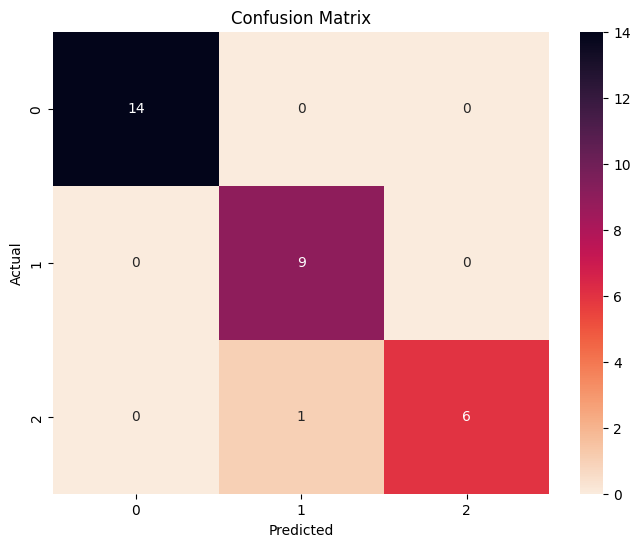

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, cmap='rocket_r', fmt='d', annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [76]:
# This is the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_knn))

0.9666666666666667


In [77]:
# Now let's use another model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

[[14  0  0]
 [ 0  9  0]
 [ 0  1  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95         9
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



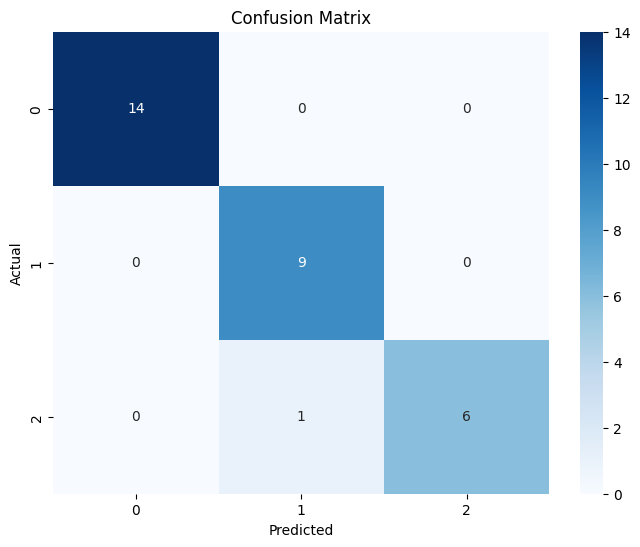

In [78]:
# visualizing the results
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, fmt='d', cmap='Blues', xticklabels = ['0','1','2'], yticklabels = ['0','1','2'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [79]:
# accuracy score
print(accuracy_score(y_test, y_pred_dtc))

0.9666666666666667


In [80]:
# So according to the results, we can see DecisionTreeClassifier and KNN is working the same in this dataset